# LIBRERIAS Y DEPENDENCIAS

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

___________________

# EDA - tip.json

In [3]:
yelp_tip= pd.read_json('../../Data/tip.json', lines= True)

In [4]:
yelp_tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


## Caracteristicas

In [5]:
yelp_tip.shape

(908915, 5)

In [6]:
yelp_tip.columns

Index(['user_id', 'business_id', 'text', 'date', 'compliment_count'], dtype='object')

## Tipos de datos

In [13]:
yelp_tip.dtypes

user_id                     object
business_id                 object
text                        object
date                datetime64[ns]
compliment_count             int64
dtype: object

## String vacios o faltantes

In [7]:
yelp_tip.apply(lambda x: (x == "").sum())

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

## Nulos

In [8]:
yelp_tip.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

## Duplicados

In [10]:
duplicate_counts = yelp_tip.apply(lambda col: col.duplicated().sum())

duplicate_counts

user_id             607157
business_id         802722
text                 57882
date                  2221
compliment_count    908908
dtype: int64

OBS: Hay muchos duplicados porque son los consejos de un mismo cliente respecto a varios locales. Para text pueden haber reviews cortas e identicas

In [11]:
# Conteo duplicado global
yelp_tip.duplicated().sum()

67

In [12]:
# Eliminacion de los duplicados globales
yelp_tip.drop_duplicates(inplace=True)

OBS: se elimina las filas exactamente iguales, indicado que un mismo user repitio el mismo mensaje

## OUTLIERS

______________

## Columna Compliment count

In [17]:
compliment_column =yelp_tip[yelp_tip['compliment_count'] == 0]
total_filas = yelp_tip.shape[0]

# Imprimir la comparación
print(f"Numero de tips con 0 compliments: {compliment_column.shape[0]} con respecto al total de filas: {total_filas} ({(compliment_column.shape[0] / total_filas) * 100:.2f}%)")

Numero de tips con 0 compliments: 898309 con respecto al total de filas: 908848 (98.84%)


OBS: Se puede evidenciar que la columna de compliments no aportaria informacion relevante ya que es 98% ceros. Esta columna se puede omitir

________________

## Columna date

In [19]:
yelp_tip['date'] = pd.to_datetime(yelp_tip['date'])  

# Definir el límite de comparación (31 de diciembre de 2023)
fecha_limite = pd.Timestamp("2023-12-31")

# Filtrar las fechas que son posteriores a la fecha límite
fechas_futuras = yelp_tip[yelp_tip['date'] > fecha_limite]

# Imprimir el número de filas con fechas posteriores a 2023
print(f"Número de tips con fechas posteriores a 2023: {fechas_futuras.shape[0]}")

Número de tips con fechas posteriores a 2023: 0


OBS: No hay fechas pasados el 2023, indicando que la informacion se registra correctamente

______________

## Representcion de conteo de tips por usuario con respecto a la contidad de negocios

In [20]:
user_tip_counts = yelp_tip['user_id'].value_counts()
business_tip_counts = yelp_tip['business_id'].value_counts()
print(user_tip_counts.describe())  # Check the distribution of tips per user
print(business_tip_counts.describe())  # Check the distribution of tips per business

count    301758.000000
mean          3.011844
std          14.591983
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        4071.000000
Name: count, dtype: float64
count    106193.000000
mean          8.558455
std          21.353690
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max        2571.000000
Name: count, dtype: float64


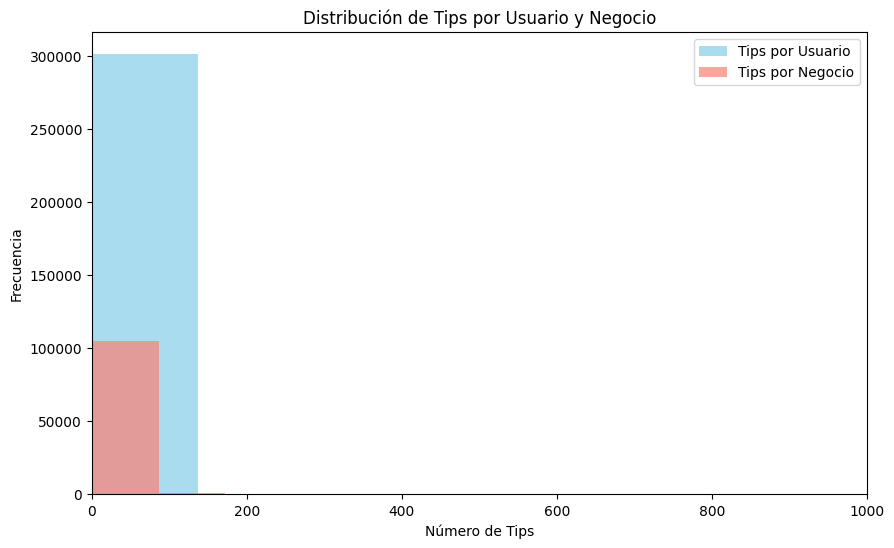

In [37]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.hist(user_tip_counts, bins=30, color='skyblue', alpha=0.7, label='Tips por Usuario')
plt.hist(business_tip_counts, bins=30, color='salmon', alpha=0.7, label='Tips por Negocio')
plt.title('Distribución de Tips por Usuario y Negocio')
plt.xlabel('Número de Tips')
plt.ylabel('Frecuencia')
plt.xlim(0, 1000)  # Limita el eje X hasta 1000
plt.legend()
plt.show()


OBS: Se observa el conteo de alrededor de 300000 tipos por usuario con respecto a 10000 tips por negocios